In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/mechanical-analysis.data', delim_whitespace = True)
df = df.reset_index()
list(df)

['level_0',
 'level_1',
 'level_2',
 'level_3',
 '=====',
 'Instance',
 'number',
 '1:',
 '=====.1']

# change to achieve similar results

In [ ]:
import random
np.random.seed(0)
random.seed(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9462 entries, 0 to 9461
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   level_0   9462 non-null   object 
 1   level_1   9462 non-null   object 
 2   level_2   9462 non-null   object 
 3   level_3   9462 non-null   object 
 4   =====     9462 non-null   object 
 5   Instance  9254 non-null   float64
 6   number    9254 non-null   float64
 7   1:        9254 non-null   object 
 8   =====.1   9254 non-null   float64
dtypes: float64(3), object(6)
memory usage: 665.4+ KB


In [ ]:
df.head(30)

,level_0,level_1,level_2,level_3,=====,Instance,number,1:,=====.1
0,1,1,0,3,0,120.00,21.00,ao,1000.0
1,1,1,1,3,0,55.00,7.50,aa,1000.0
2,1,1,2,3,0,26.00,1.40,vo,1000.0
3,1,1,3,3,0,11.00,0.80,va,1000.0
4,1,1,4,2,0,7.00,5.50,ao,1000.0
5,1,1,5,2,0,25.00,5.50,aa,1000.0
6,1,1,6,2,0,13.00,0.75,vo,1000.0
7,1,1,7,2,0,9.00,0.95,va,1000.0
8,1,1,8,2,6000,8.00,0.40,io,1000.0
9,1,1,9,2,6000,5.50,0.30,ia,1000.0


In [ ]:
df['number'].isnull().sum()

208

In [ ]:
instances = [0]
inst = df[df['number'].isnull()].index.tolist()

instances.extend(inst)
instances.extend([9462])

df['inst'] = 0 

count = 1

for i in range(len(instances)-1):
    
    while count in [8,12,32,33,66,69,73,152,167,194,203,208]:
        
        count += 1
    
    df.loc[instances[i]:instances[i+1]-1, 'inst'] += count
    count += 1
    

df

,level_0,level_1,level_2,level_3,=====,Instance,number,1:,=====.1,inst
0,1,1,0,3,0,120.00,21.0,ao,1000.0,1
1,1,1,1,3,0,55.00,7.5,aa,1000.0,1
2,1,1,2,3,0,26.00,1.4,vo,1000.0,1
3,1,1,3,3,0,11.00,0.8,va,1000.0,1
4,1,1,4,2,0,7.00,5.5,ao,1000.0,1
...,...,...,...,...,...,...,...,...,...,...
9457,1,6,35,3,27000,0.65,0.0,io,1500.0,221
9458,1,6,36,3,30000,0.70,0.0,io,1500.0,221
9459,1,6,37,3,32000,0.60,0.0,iv,1500.0,221
9460,1,6,38,4,1500,0.60,0.0,iv,1500.0,221


In [ ]:
df.columns = ['dummy', 'class', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega', 'instance']

df = df.drop('dummy', axis = 1)

df = df.drop(instances[1:-1], axis = 0)

df = df.reset_index()

df

,index,class,number,sup,cpm,mis,misr,dir,omega,instance
0,0,1,0,3,0,120.00,21.0,ao,1000.0,1
1,1,1,1,3,0,55.00,7.5,aa,1000.0,1
2,2,1,2,3,0,26.00,1.4,vo,1000.0,1
3,3,1,3,3,0,11.00,0.8,va,1000.0,1
4,4,1,4,2,0,7.00,5.5,ao,1000.0,1
...,...,...,...,...,...,...,...,...,...,...
9249,9457,6,35,3,27000,0.65,0.0,io,1500.0,221
9250,9458,6,36,3,30000,0.70,0.0,io,1500.0,221
9251,9459,6,37,3,32000,0.60,0.0,iv,1500.0,221
9252,9460,6,38,4,1500,0.60,0.0,iv,1500.0,221


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     9254 non-null   int64  
 1   class     9254 non-null   object 
 2   number    9254 non-null   object 
 3   sup       9254 non-null   object 
 4   cpm       9254 non-null   object 
 5   mis       9254 non-null   float64
 6   misr      9254 non-null   float64
 7   dir       9254 non-null   object 
 8   omega     9254 non-null   float64
 9   instance  9254 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 723.1+ KB


In [ ]:
c7 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 17, 18, 19, 23, 25, 27, 28, 29, 30, 31,
35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 52, 55, 58, 60, 72, 74, 76, 90, 166, 168, 170, 173]
     
c8 = [24, 26, 51, 81, 82, 83, 85, 86, 87, 88, 89, 91, 93, 99, 100, 103,
105, 116, 118, 119, 120, 121, 125, 142, 145, 156, 160, 171]

c9 = [104, 111, 138, 149, 150, 151, 157, 162, 174, 186]   
  
c10 = [48, 50, 57, 63, 64, 65, 67, 68, 70, 101, 102, 106, 108, 112, 
113, 114, 115, 117, 123, 124, 128, 130, 131, 132, 135, 141, 143, 159, 161]

In [ ]:
cc = [c7, c8, c9, c10]

df['comb. class'] = np.nan

for i, cc in enumerate(cc):
    for c in cc:
        df.loc[df['instance'] == c, 'comb. class'] = 7 + i

In [ ]:
df['other class'] = np.nan

for i in [11, 49]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 5:
        df.loc[df['instance'] == i, 'other class'] = 7
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 5
        
for i in [162]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 4:
        df.loc[df['instance'] == i, 'other class'] = 9
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 4

for i in [171]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 4:
        df.loc[df['instance'] == i, 'other class'] = 8
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 4

for i in [38]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 7:
        df.loc[df['instance'] == i, 'other class'] = 3
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 7

for i in [172]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 4:
        df.loc[df['instance'] == i, 'other class'] = 3
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 4

for i in [14, 90]:
    
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 2:
        df.loc[df['instance'] == i, 'other class'] = 7
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 2

for i in [104]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 9:
        df.loc[df['instance'] == i, 'other class'] = 1
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 9

for i in [24]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 8:
        df.loc[df['instance'] == i, 'other class'] = 1
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 8

for i in [179]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 5:
        df.loc[df['instance'] == i, 'other class'] = 1
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 5

for i in [96, 97, 136, 140]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 2:
        df.loc[df['instance'] == i, 'other class'] = 1
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 2
    
    
for i in [20, 59]:
    a = df.loc[df['instance'] == i, 'class'].unique()[0]
    
    if a == 3:
        df.loc[df['instance'] == i, 'other class'] = 1
    
    else:
        df.loc[df['instance'] == i, 'other class'] = 3 

In [ ]:
df = df[['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega', 'class', 'comb. class', 'other class']]


df.to_csv('mechanical_analysis.csv', index=False)

***The main problem up to here is that the classes are expressed in three different columns, making it impossible to train a model on them***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def classes(df, instance):
    """Return all the classes to which this instance belong."""
    a = int(df.loc[df['instance'] == instance, 'class'].unique()[0])
    if a == 6:
        classes_set = {}
    else:
        classes_set = {a}
    # basic class added
    classes_set.update(multi_class(df.loc[df['instance'] == instance, 'comb. class'].unique()[0]))
    # classis in comb classes added
    classes_set.update(multi_class(df.loc[df['instance'] == instance, 'other class'].unique()[0]))
    # other class added
    
    return list(classes_set)

def multi_class(comb_class):
    """Return all the classes that belong to a multiclass."""
    if str(comb_class)=='nan':
        return []
    comb_class = int(comb_class)
    if comb_class == 7:
        return [1,4]
    elif comb_class == 8:
        return [2, 3, 5]
    elif comb_class == 9:
        return [2, 3, 5]
    elif comb_class == 10:
        return [1,2,3,4,5]
    else:
        return []

# **Creating a new column that contains all the classes that each datapoint belongs to.**

In [ ]:
df['all classes'] = [classes(df, row['instance']) for index, row in df.iterrows()]

In [ ]:
df

,instance,number,sup,cpm,mis,misr,dir,omega,class,comb. class,other class,all classes
0,1,0,3,0,120.00,21.0,ao,1000.0,1,7.0,NaN,"[1, 4]"
1,1,1,3,0,55.00,7.5,aa,1000.0,1,7.0,NaN,"[1, 4]"
2,1,2,3,0,26.00,1.4,vo,1000.0,1,7.0,NaN,"[1, 4]"
3,1,3,3,0,11.00,0.8,va,1000.0,1,7.0,NaN,"[1, 4]"
4,1,4,2,0,7.00,5.5,ao,1000.0,1,7.0,NaN,"[1, 4]"
...,...,...,...,...,...,...,...,...,...,...,...,...
9249,221,35,3,27000,0.65,0.0,io,1500.0,6,NaN,NaN,[]
9250,221,36,3,30000,0.70,0.0,io,1500.0,6,NaN,NaN,[]
9251,221,37,3,32000,0.60,0.0,iv,1500.0,6,NaN,NaN,[]
9252,221,38,4,1500,0.60,0.0,iv,1500.0,6,NaN,NaN,[]


# Reduce dataset



* It is possible to get rid of the old columns describing the classes
* Now the dataset is more clear and suitable for training. However, there is some more preprocessing needed before it is possible to input it to a model.

In [ ]:
reduced_df = df[['instance','number','sup','cpm','mis','misr','dir','omega','all classes']]

Splitting into test and train

For the same instance we have multiple datapoints, so when splitting between training and testing we should keep datapoints from the same instance together. This is why the dataset is splitted before cleaning it further.

In [ ]:
from math import ceil
import random
max_instances = 221
test_size = 0.20
# note that there are no instances numbered 8,12,32,33,66,69,73,152,167,194,203,208
not_instance = {8,12,32,33,66,69,73,152,167,194,203,208}
instance_list = [inst for inst in range(1,max_instances + 1) if inst not in not_instance]
random.shuffle(instance_list)
test_instances = instance_list[:ceil(len(instance_list)*test_size)]
# randomly choose test instances
train_instances = instance_list[ceil(len(instance_list)*test_size):]

reduced_df = reduced_df.set_index('instance')
# index set to instance to split the dataframe according to the instance column
test_df = reduced_df.loc[test_instances]
train_df = reduced_df.loc[train_instances]
test_df = test_df.reset_index()
train_df = train_df.reset_index()
reduced_df = reduced_df.reset_index()

Observe that now all the datapoints with the same instance are in the same set, either testing or training set

In [ ]:
test_df

,instance,number,sup,cpm,mis,misr,dir,omega,all classes
0,48,0,1,0,14.00,0.0,ao,3000.0,"[1, 2, 3, 4, 5]"
1,48,1,1,0,4.25,0.0,vo,3000.0,"[1, 2, 3, 4, 5]"
2,48,2,2,0,26.00,0.0,ao,3000.0,"[1, 2, 3, 4, 5]"
3,48,3,2,0,17.00,0.0,av,3000.0,"[1, 2, 3, 4, 5]"
4,48,4,2,0,25.00,0.0,aa,3000.0,"[1, 2, 3, 4, 5]"
...,...,...,...,...,...,...,...,...,...
1845,54,49,2,18000,2.00,0.0,io,3000.0,[1]
1846,54,50,2,21000,0.70,0.0,io,3000.0,[1]
1847,54,51,2,21000,1.75,0.0,iv,3000.0,[1]
1848,54,52,2,21000,1.00,0.0,ia,3000.0,[1]


Creating targets

The set of classes must be converted into a binary multilabel, because contrary to lists of varying sizes some models accept binary multilabels as target

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
y_test = test_df['all classes']
y_test = MultiLabelBinarizer().fit_transform(y_test)
y_train = train_df['all classes']
y_train = MultiLabelBinarizer().fit_transform(y_train)

fROM THE PREVIOUS DECISION

> Extracting features





*   Some instances have 29 datapoints while others have 39 datapoints. This suggest that the number of the test doesn't carry valuable information.

*   Also, as we already splitted the data, so we can forget about the instance



In [ ]:
X_train = train_df.drop(['instance','number','all classes'],axis=1)
X_test = test_df.drop(['instance','number','all classes'],axis=1)

Flagging categorical data



1.   There are some features that use categorical input, those ones must be flagged before inputting them into the model


In [ ]:
categorical_columns_subset = ['dir']
numerical_columns_subset = ['cpm','sup','mis','misr','omega']
def get_categorical_data_ready(X):
    """Flags the categorical data."""
    X = X[categorical_columns_subset + numerical_columns_subset]
    X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")
    return X

# the categorical data in our dataframes is flagged
X_test = get_categorical_data_ready(X_test)
X_train = get_categorical_data_ready(X_train)

##This concludes the preprocessing!!

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)
rf_clas = make_pipeline(
    one_hot_encoder, RandomForestClassifier(criterion = "entropy", random_state=42)
)

Train the model

In [ ]:
rf_clas.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1a1e9446d0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', random_state=42))])

Test the model


1.   This dataset aims to detect the problems in a mechanical system, presumably to repair them.
Therefore, covarage_error will be used as a metric, because 
2.  it will return the average number of suggestions that the model should propose to cover all the problems in the system



In [ ]:
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
print(f"The average number of errors in each instance is {round(sum(sum(y_test))/len(y_test),2)}")
print(f"The average number of errors the model must suggest to cover all the errors is {round(coverage_error(y_test,rf_clas.predict(X_test)),2)}")

The average number of errors in each instance is 2.01
The average number of errors the model must suggest to cover all the errors is 3.65


##Analysis of the results

In [ ]:
y_guess = rf_clas.predict(X_test)
np.random.shuffle(y_guess)
print(f"The average number of errors in each instance is {round(sum(sum(y_test))/len(y_test),2)}")
print(f"The average number of errors the model must suggest to cover all the errors is {round(coverage_error(y_test,y_guess),2)}")

The average number of errors in each instance is 2.01
The average number of errors the model must suggest to cover all the errors is 3.88


These guesses are being done given only one datapoint, but for each instance we have multiple datapoints, we can use all the available datapoints to make better decisions for each instance.

In [ ]:
def multiple_guesses_to_one(guesses):
    """Using multiple guesses outputs a collaborative guess."""
    return sum([np.square(guess) for guess in guesses])/len(guesses)

Regarding our new testing set we have to refer to test_df because that dataframe contains the instance to which each datapoint belongs to.
We will focus at one instance at a time, storing the final predictions in y_pred and the real values in y_inst_test.

In [ ]:
test_instances = set(test_df['instance'])
y_inst_test = []
y_pred = []
for inst in test_instances:
    y_inst = test_df.loc[test_df['instance']==inst,'all classes'].tolist()[0]
    y_inst_test.append(y_inst)
    X_inst = test_df[test_df['instance']==inst].drop(['instance','number','all classes'],axis=1)
    X_inst = get_categorical_data_ready(X_inst)
    # This is a dataframe with the same columns as the one used for training 
    # but containing only the datapoints of inst.
    # so we can predict on it and then bring all the guesses to one.
    y_pred.append(multiple_guesses_to_one(rf_clas.predict(X_inst)))
    
y_inst_test = MultiLabelBinarizer(classes=[1,2,3,4,5]).fit_transform(y_inst_test)
y_pred = np.array(y_pred)
print(f"The average number of errors in each instance is {round(sum(sum(y_inst_test))/len(y_inst_test),2)}")
print(f"The average number of errors the model must suggest to cover all the errors is {round(coverage_error(y_inst_test, y_pred),2)}")

The average number of errors in each instance is 1.9
The average number of errors the model must suggest to cover all the errors is 2.76


Precision, Recall, F1 Score,
Accuracy, TPR, FPR, RoC curve

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Calculate Precision, Recall, F1 Score and Accuracy
precision = precision_score(y_inst_test, y_pred.round(), average='samples')
recall = recall_score(y_inst_test, y_pred.round(), average='samples')
fscore = f1_score(y_inst_test, y_pred.round(), average='samples')
accuracy = accuracy_score(y_inst_test, y_pred.round())

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {fscore}")
print(f"Accuracy: {accuracy}")

# Calculate RoC curve for each class
roc_auc = roc_auc_score(y_inst_test, y_pred, average='macro', multi_class='ovr')

print(f"AUC-ROC score: {roc_auc}")

Precision: 0.5063492063492064
Recall: 0.5071428571428571
F1 Score: 0.4662320483749055
Accuracy: 0.30952380952380953
AUC-ROC score: 0.7440347594878407


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


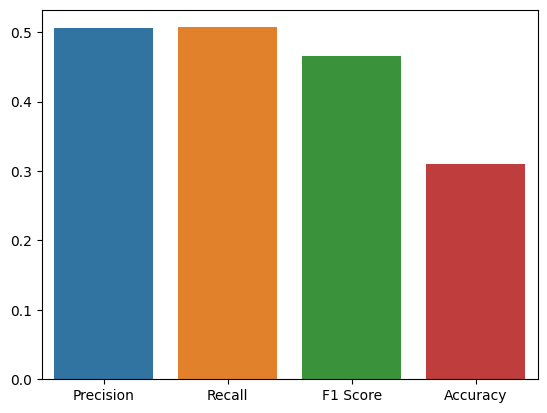

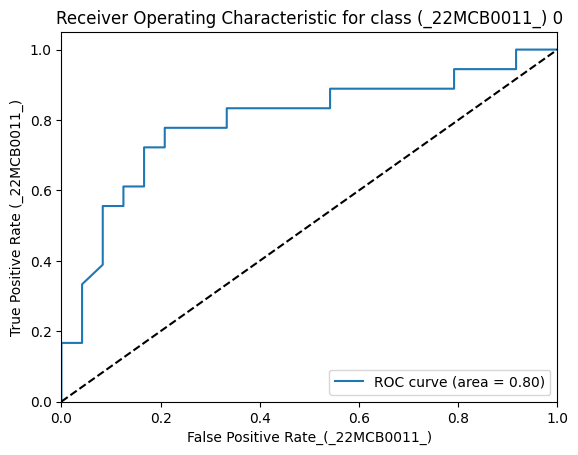

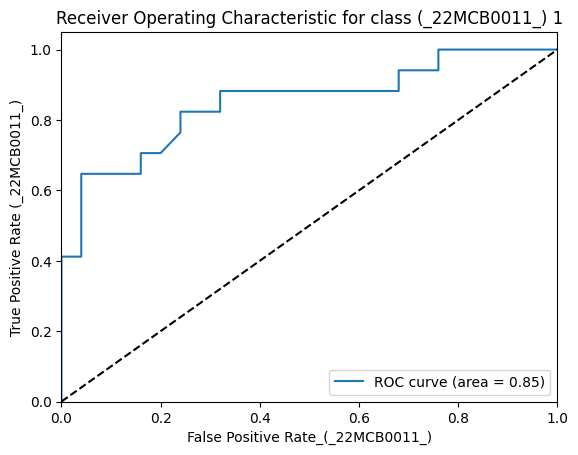

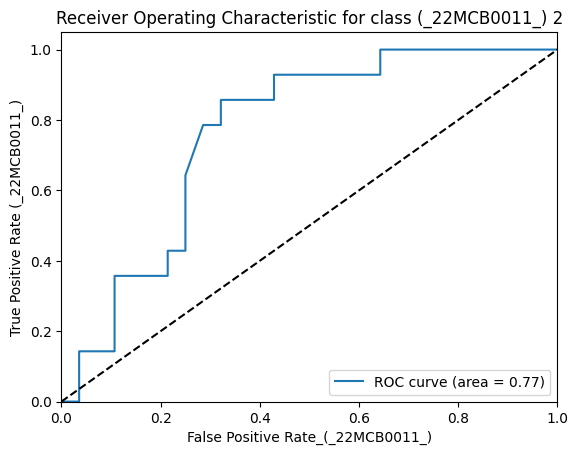

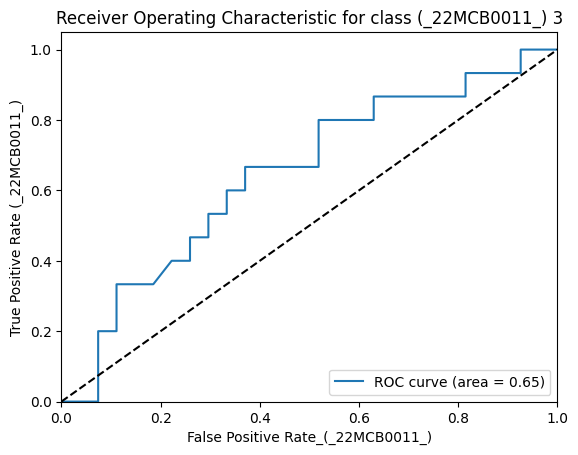

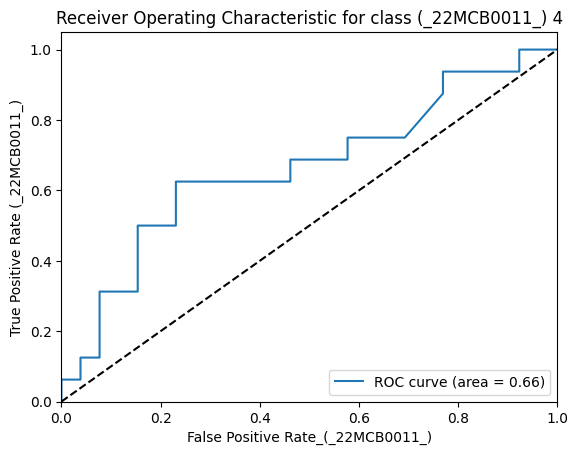

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# Creating a bar plot for Precision, Recall, F1 Score and Accuracy
metrics = [precision, recall, fscore, accuracy]
metric_label = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

sns.barplot(x = metric_label, y = metrics)
plt.show()

# ROC curve for each class
n_classes = y_inst_test.shape[1]
y_score = y_pred
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_inst_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate_(_22MCB0011_)')
    plt.ylabel('True Positive Rate (_22MCB0011_)')
    plt.title('Receiver Operating Characteristic for class (_22MCB0011_) {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()
